# Prediction of sales

### Problem Statement
[The dataset](https://drive.google.com/file/d/1B07fvYosBNdIwlZxSmxDfeAf9KaygX89/view?usp=sharing) represents sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store are available. The aim is to build a predictive model and find out the sales of each product at a particular store.

|Variable|Description|
|: ------------- |:-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



### In following weeks, we will explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

This is a very pivotal step in the process of analyzing data. This involves understanding the problem and making some hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analysis which we can potentially perform if data is available.

#### Possible hypotheses
##### Store Level Hypotheses:

1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
3. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
4. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
5. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
6. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
7. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
8. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

##### Product Level Hypotheses:

1. Brand: Branded products should have higher sales because of higher trust in the customer.
2. Packaging: Products with good packaging can attract customers and sell more.
3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6. Advertising: Better advertising of products in the store will should higher sales in most cases.
7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

Think further and create some of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Perform some basic data exploration here and come up with some inferences about the data. Try to figure out some irregularities and address them in the next section. 

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
import pandas as pd
import numpy as np

#Read files:
data = pd.read_csv("regression_exercise.csv", delimiter=',')

In [83]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [84]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**Task:** One of the key challenges in any data set is missing values. Lets start by checking which columns contain missing values.

In [85]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent],axis=1, keys=['Total','Percent'])
missing_data.head(15)

,Total,Percent
Outlet_Size,2410,0.282764
Item_Weight,1463,0.171653
Item_Outlet_Sales,0,0.000000
Outlet_Type,0,0.000000
Outlet_Location_Type,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Identifier,0,0.000000
Item_MRP,0,0.000000
Item_Type,0,0.000000
Item_Visibility,0,0.000000


In [86]:
# # extract the names of columns with missing values
# col_with_missing = missing_data[missing_data.Percent > 0].index.tolist()

# # remove column names that are alteady removed from dataset
# missing_cols = list(set(col_with_missing) - set(to_drop))

# check the datatype
data.dtypes[['Outlet_Size','Item_Weight']]

Outlet_Size     object
Item_Weight    float64
dtype: object

**Task:**: Look at some basic descriptive statistics for numerical variables.

Make some observations: <br>
Do min, max values make sense?

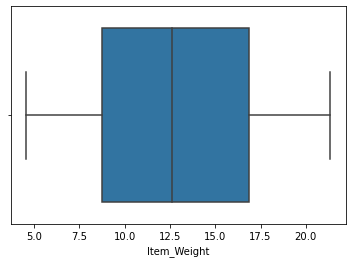

In [87]:
sns.boxplot(data['Item_Weight'])
plt.show()

No, because the average and the median are close, so the best way is to use mean

**Task:** Moving to nominal (categorical) variable, lets have a look at the number of unique values in each of them.

In [88]:
data.groupby('Outlet_Size').size()

Outlet_Size
High       932
Medium    2793
Small     2388
dtype: int64

**Task:** How many products are there, how many stores, item types?

**Task:** Explore the numbers of each categorical variable

In [89]:
# product quantity
total_products = data['Item_Identifier'].count()
total_store = data.Outlet_Identifier.nunique()
total_item_type = data.Item_Type.nunique()
print(total_products,total_store,  total_item_type)

8523 10 16


In [90]:
number_Item_Type = data['Item_Type'].nunique()
number_Item_Fat_Content = data['Item_Fat_Content'].nunique()
number_Item_Type = data['Item_Type'].nunique()
number_Outlet_Size = data['Outlet_Size'].nunique()
number_Outlet_Location_Type = data['Outlet_Location_Type'].nunique()
number_Outlet_Type = data['Outlet_Type'].nunique()
print(number_Item_Type,number_Item_Fat_Content, number_Item_Type,number_Outlet_Size, number_Outlet_Location_Type, number_Outlet_Type  )

16 5 16 3 3 4


Observe the output:

Tip: look at the unique values of `Item_Fat_Content`

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

**Task:** Which variables have missing values? How can you fill those values? Think of some suitalbe strategy (zero filling, mean, median values. Maybe mean values per `Item_Type`?)

In [91]:
# extract the names of columns with missing values
col_with_missing = missing_data[missing_data.Percent > 0].index.tolist()

# remove column names that are alteady removed from dataset
missing_cols = list(set(col_with_missing))

# check the datatype
data.dtypes[missing_cols]

Item_Weight    float64
Outlet_Size     object
dtype: object

In [92]:
# create a separate column to keep the information whether the value was missing
num_cols_with_missing = data.dtypes[missing_cols][data.dtypes[missing_cols] == 'float']\
                        .index.tolist()

# create new varible with the information that it was missing
for cl in num_cols_with_missing:
    data[cl + '_missing_ind']=0
    data.loc[data[cl].isnull(), cl + "_missing_ind"]=1

In [93]:
data['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [94]:
#variables missing variables = ['Outlet_Size','Item_Weight']]
# calculate the mean from each Item_type
mean_per_item_type = data.groupby('Item_Type').mean()['Item_Weight']
mean_per_item_type

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [95]:
# Replace value withe the mean item type = Checked the results
data['Item_Weight']=data["Item_Weight"].fillna(data.groupby('Item_Type')['Item_Weight'].transform('mean'))

In [103]:
# Replace categorical valeu with = Checked the results
data["Outlet_Size"] = data["Outlet_Size"].fillna("Empty")

**Task:** Check if there are no more missing values

In [105]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent],axis=1, keys=['Total','Percent'])
missing_data.head(15)

,Total,Percent
Item_Weight_missing_ind,0,0.0
Item_Outlet_Sales,0,0.0
Outlet_Type,0,0.0
Outlet_Location_Type,0,0.0
Outlet_Size,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Identifier,0,0.0
Item_MRP,0,0.0
Item_Type,0,0.0
Item_Visibility,0,0.0
